# Car Price Assignment

A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts. Essentially, the company wants to know:

1. Which variables are significant in predicting the price of a car
2. How well those variables describe the price of a car

Business Goal:

You are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for the management to understand the pricing dynamics of a new market. 

# Importing And Understanding Data

In [38]:
import pandas as pd
import numpy as np

In [39]:
car_df = pd.read_csv('CarPrice_Assignment.csv')

In [40]:
car_df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [41]:
print(car_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

Dataset contains 205 rows and 25 columns, out of which there are many categorical variables, which needs to be prepared for creation of the model.
There are no missing values.

# Data Cleaning

As part of Data Cleaning, the following steps have been done:
1. Columns are renamed to have consist naming conventions.
2. There is an Car_ID column which can be set as the index, so have set it to index.
3. As per problem statement, Car name is split to retain only Car company.
4. Car name is fixed for invalid car company names.
5. As per Data dictionary, Symboling (renamed to Risk_Rating) is converted to categorical variable.

In [42]:
def import_and_clean_data():
    # import data
    car_df = pd.read_csv('CarPrice_Assignment.csv')
       
    # Rename columns to have standard naming conventions
    car_df.rename(index=str, columns={"car_ID": "ID", "symboling": "Risk_Rating", 
                                  "CarName":"Company", "fueltype":"Fuel_Type",
                                 "aspiration":"Aspiration","doornumber":"Doors",
                                 "carbody":"Body","drivewheel":"Drive_Wheel",
                                 "enginelocation":"Engine_Location","wheelbase":"Wheel_Base",
                                 "carlength":"Length","carwidth":"Width",
                                 "carheight":"Height","curbweight":"Weight",
                                 "enginetype":"Engine_Type","cylindernumber":"Cylinders",
                                 "enginesize":"Engine_Size","fuelsystem":"Fuel_System",
                                 "boreratio":"Bore_Ratio","stroke":"Engine_Stroke",
                                 "compressionratio":"Compression_Ratio","horsepower":"Horsepower",
                                 "peakrpm":"Peak_RPM","citympg":"City_Mileage",
                                 "highwaympg":"Highway_Mileage","price":"Price"}, inplace=True)
    
    # ID can be set as index column, which is car_ID
    car_df.set_index('ID',inplace=True)
    
    # Split CarName to contain only Car Name
    car_df.Company = car_df.Company.apply(lambda x: x.split(' ')[0])
    
    # Cleanup Car Company name data errors
    car_df.Company = car_df.Company.apply(lambda x: x.replace('alfa-romero','alfa-romeo'))
    car_df.Company = car_df.Company.apply(lambda x: x.replace('vw','volkswagen'))
    car_df.Company = car_df.Company.apply(lambda x: x.replace('maxda','mazda'))
    car_df.Company = car_df.Company.apply(lambda x: x.replace('toyouta','toyota'))
    car_df.Company = car_df.Company.apply(lambda x: x.replace('vokswagen','volkswagen'))
    car_df.Company = car_df.Company.apply(lambda x: x.replace('porcshce','porsche'))
    
    #Convert Symboling (Risk_Rating) to Categorical as per Data Dictionary
    car_df.Risk_Rating = car_df.Risk_Rating.astype('category')
    
    return car_df

# EDA

In [43]:
# method to quickly refresh data at a later point
car_df = import_and_clean_data()

In [44]:
# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Univariate Analysis

Summary metrics of Numeric Variables
       Wheel_Base      Length       Width      Height       Weight  \
count  205.000000  205.000000  205.000000  205.000000   205.000000   
mean    98.756585  174.049268   65.907805   53.724878  2555.565854   
std      6.021776   12.337289    2.145204    2.443522   520.680204   
min     86.600000  141.100000   60.300000   47.800000  1488.000000   
25%     94.500000  166.300000   64.100000   52.000000  2145.000000   
50%     97.000000  173.200000   65.500000   54.100000  2414.000000   
75%    102.400000  183.100000   66.900000   55.500000  2935.000000   
max    120.900000  208.100000   72.300000   59.800000  4066.000000   

       Engine_Size  Bore_Ratio  Engine_Stroke  Compression_Ratio  Horsepower  \
count   205.000000  205.000000     205.000000         205.000000  205.000000   
mean    126.907317    3.329756       3.255415          10.142537  104.117073   
std      41.642693    0.270844       0.313597           3.972040   39.544167   
min      61.

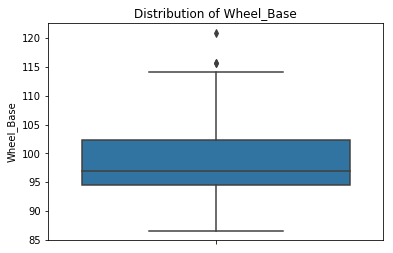

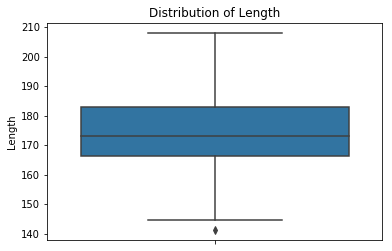

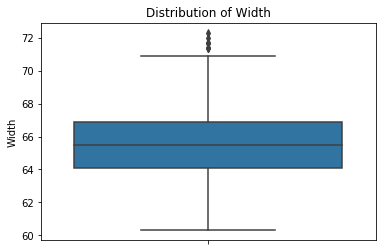

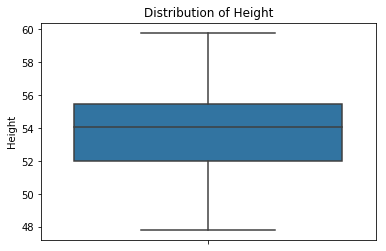

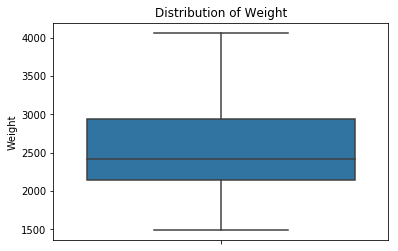

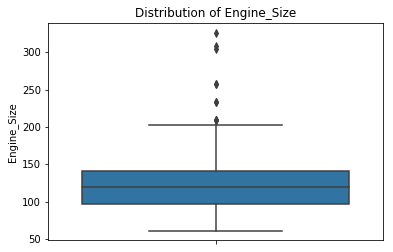

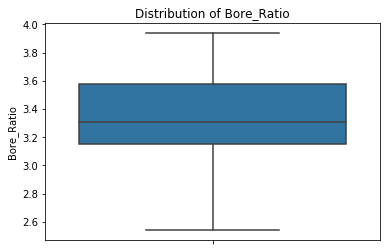

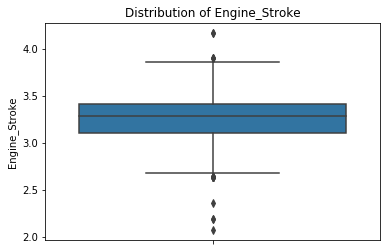

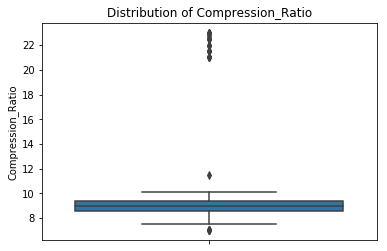

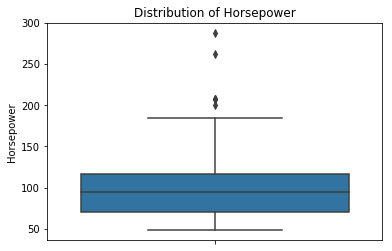

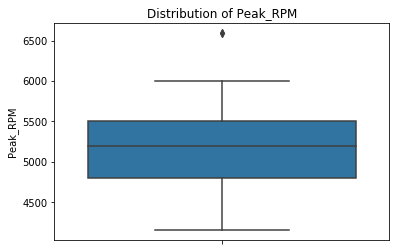

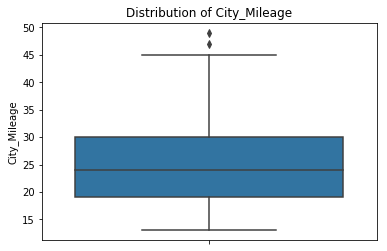

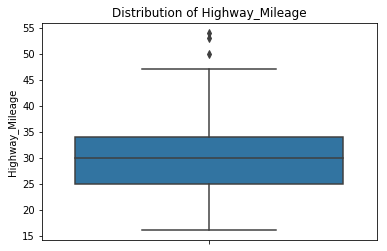

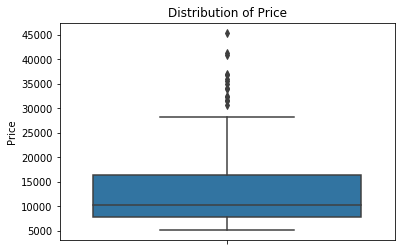

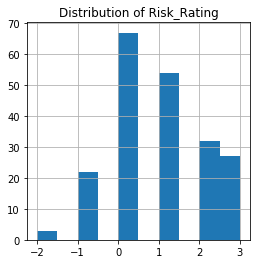

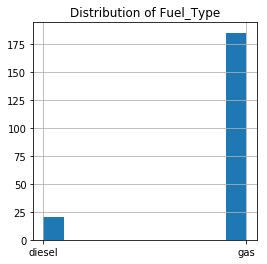

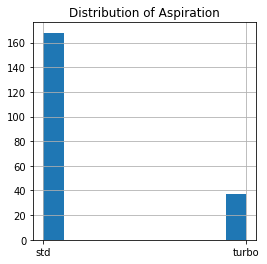

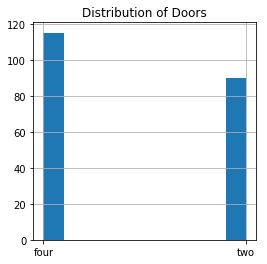

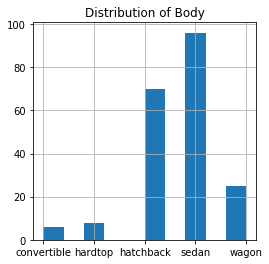

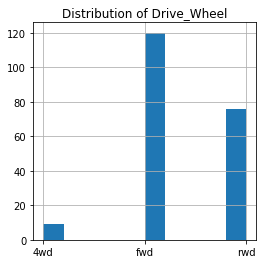

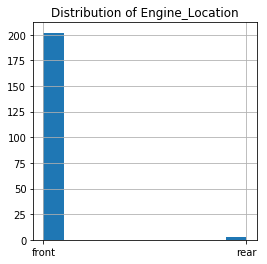

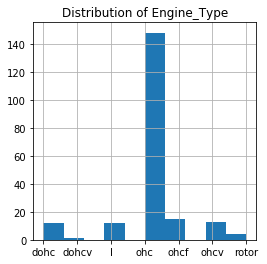

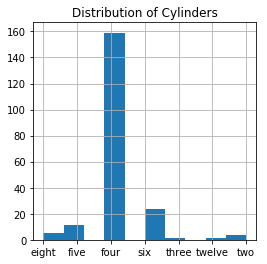

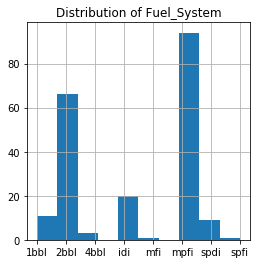

In [45]:
# Univariate Analysis on Numeric Variables
print('Summary metrics of Numeric Variables')
numeric_df = car_df._get_numeric_data()
print(car_df._get_numeric_data().describe())

# Plot Box plot for Numeric variables
def plot_box(car_df, numeric_variable):
    sns.boxplot(y=car_df[numeric_variable])
    #plt.yscale('log')
    #plt.ylim(5, 50)
    plt.title("Distribution of "+ numeric_variable)
    plt.show()

# Loop for all numeric variables
for numeric_variable in car_df._get_numeric_data():
    plot_box(car_df, numeric_variable)
    # Considering numeric variable as categorical variables, plot histogram to understand any spikes
    # plot_histogram(car_df, numeric_variable)
    
# Univariate Analysis for Categorical Variables
def plot_histogram(car_df,categorical_variable):
    car_df[categorical_variable].hist(figsize=[4,4])
    plt.title("Distribution of "+ categorical_variable)
    plt.show()

# Create list of Categorical Columns
categorical_list = ['Risk_Rating','Fuel_Type','Aspiration','Doors','Body','Drive_Wheel','Engine_Location'
                    ,'Engine_Type','Cylinders','Fuel_System']

# Plot histogram for Unordered Categorical Variables
for categorical_variable in categorical_list:
    plot_histogram(car_df, categorical_variable)


Univariate Analysis Summary:
1. Most of the numerical variables like Horsepower, Peak_RPM, Compression_Ratio, Engine_Size, Price etc have outliers.
2. Price has a median of 10295 and min, max values are 5118 and 45400 respectively.
3. 50% of the Compression_Ratio lie between 8.6 and 9.4 .
4. Median of City_Mileage and Highway_Mileage are 24 and 30 respectively.
5. Median of Engine_Size and Horsepower are 120 and 95 respectively.
6. Gas is the most frequent Fuel_Type.
7. std is the most frequent Aspiration type.
8. Most cars have sedan body followed by hatchback, while wagon, hardtop and convertible types are less frequent.
9. Most cars have Front wheel drive followed by Rear wheel drive and very less cars with 4 wheel drive.
10. Most cars have Engine_Location at Front.

### Bivariate Analysis

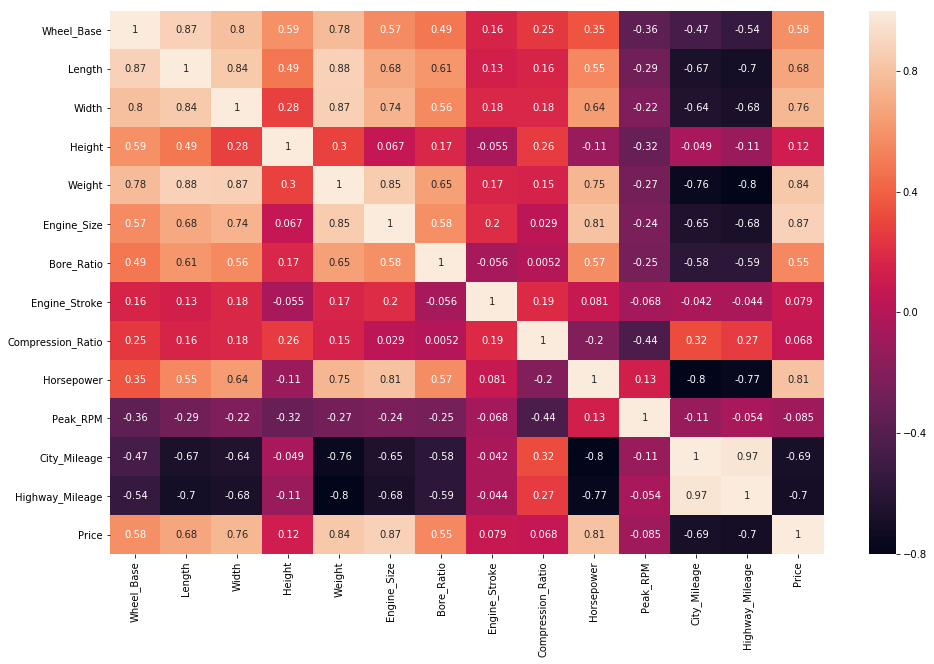

In [46]:
# Let's see the correlation matrix 
plt.figure(figsize = (16,10))     # Size of the figure
sns.heatmap(numeric_df.corr(),annot = True)

Bivariate Analysis - Summary:
1. Wheel_Base, Length, Width, Weight, Engine_Size, Horsepower are positively correlated with Price.
2. City_Milage and Highway_Mileage are negatively correlated with Wheel_Base, Length, Width, Weight, Engine_Size, Bore_Ratio, Horsepower and Price.
3. Wheel_Base, Length, Width, Weight, Engine_Size, Bore_Ratio, Horsepower form a cluster among themselves which are all positively correlated.

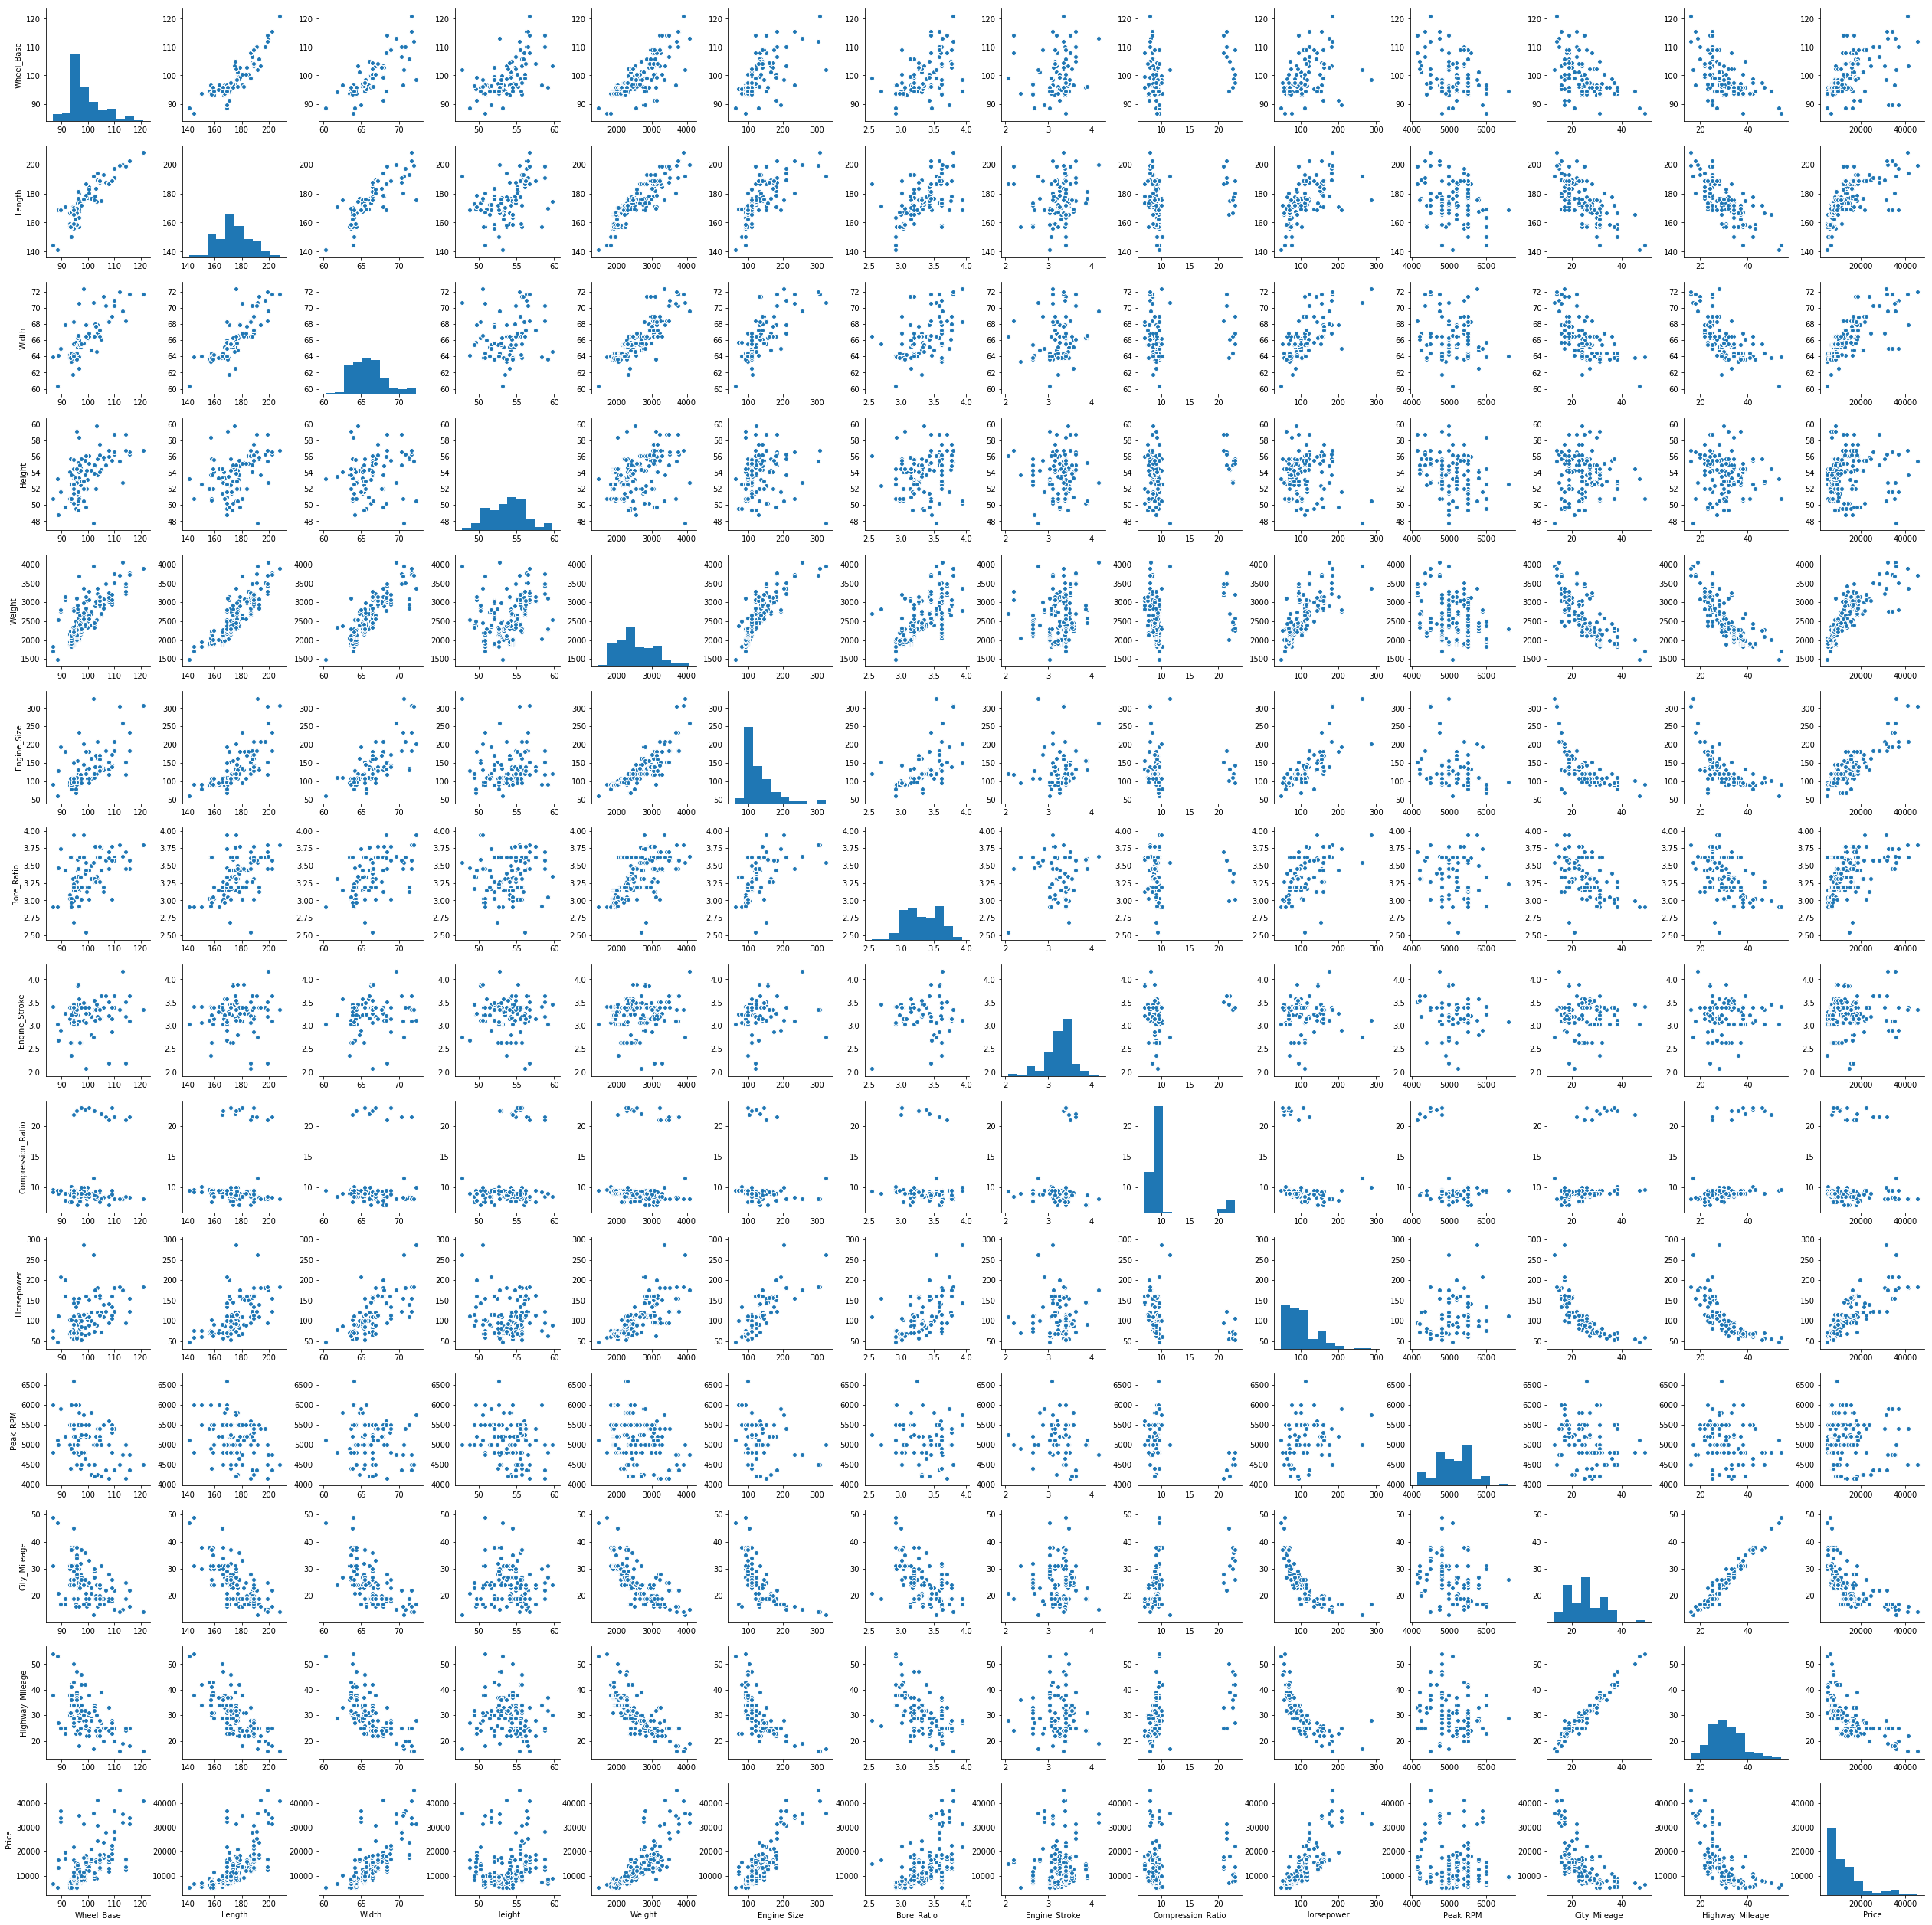

In [47]:
# Let's plot a pair plot of all numeric variables in our dataframe
sns.pairplot(numeric_df)

# Data Preparation

In [48]:
# UDF to create dummies for categorical variables
def create_dummies(df, col_name):
    # we can use drop_first = True to drop the first column from dummies df.
    dummies = pd.get_dummies(df[col_name],drop_first=True)
    dummies.columns = [str(col) + '_' + col_name for col in dummies.columns]
    #Adding the results to the master dataframe
    df = pd.concat([df,dummies],axis=1)
    # Dropping original column as we have created the dummies for it
    df.drop([col_name],axis=1,inplace=True)
    return df

# Use the categorical list created earlier and add Company to create dummies for all categorical variables
categorical_list.append('Company')

for category in categorical_list:
    car_df = create_dummies(car_df,category)

car_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 1 to 205
Data columns (total 70 columns):
Wheel_Base              205 non-null float64
Length                  205 non-null float64
Width                   205 non-null float64
Height                  205 non-null float64
Weight                  205 non-null int64
Engine_Size             205 non-null int64
Bore_Ratio              205 non-null float64
Engine_Stroke           205 non-null float64
Compression_Ratio       205 non-null float64
Horsepower              205 non-null int64
Peak_RPM                205 non-null int64
City_Mileage            205 non-null int64
Highway_Mileage         205 non-null int64
Price                   205 non-null float64
-1_Risk_Rating          205 non-null uint8
0_Risk_Rating           205 non-null uint8
1_Risk_Rating           205 non-null uint8
2_Risk_Rating           205 non-null uint8
3_Risk_Rating           205 non-null uint8
gas_Fuel_Type           205 non-null uint8
turbo_Aspiration   

# Normalization

In [49]:
#defining a normalisation function 
def normalize (x): 
    return ( (x-np.mean(x))/ (max(x) - min(x)))
                                            
                                              
# applying normalize ( ) to all columns 
car_df = car_df.apply(normalize) 

# Splitting Data into Training and Testing Sets

In [50]:
car_df.columns

Index(['Wheel_Base', 'Length', 'Width', 'Height', 'Weight', 'Engine_Size',
       'Bore_Ratio', 'Engine_Stroke', 'Compression_Ratio', 'Horsepower',
       'Peak_RPM', 'City_Mileage', 'Highway_Mileage', 'Price',
       '-1_Risk_Rating', '0_Risk_Rating', '1_Risk_Rating', '2_Risk_Rating',
       '3_Risk_Rating', 'gas_Fuel_Type', 'turbo_Aspiration', 'two_Doors',
       'hardtop_Body', 'hatchback_Body', 'sedan_Body', 'wagon_Body',
       'fwd_Drive_Wheel', 'rwd_Drive_Wheel', 'rear_Engine_Location',
       'dohcv_Engine_Type', 'l_Engine_Type', 'ohc_Engine_Type',
       'ohcf_Engine_Type', 'ohcv_Engine_Type', 'rotor_Engine_Type',
       'five_Cylinders', 'four_Cylinders', 'six_Cylinders', 'three_Cylinders',
       'twelve_Cylinders', 'two_Cylinders', '2bbl_Fuel_System',
       '4bbl_Fuel_System', 'idi_Fuel_System', 'mfi_Fuel_System',
       'mpfi_Fuel_System', 'spdi_Fuel_System', 'spfi_Fuel_System',
       'alfa-romeo_Company', 'audi_Company', 'bmw_Company', 'buick_Company',
       'chevrolet

In [51]:
# Putting feature variable to X
x = car_df[['Wheel_Base', 'Length', 'Width', 'Height', 'Weight',
       'Engine_Size', 'Bore_Ratio', 'Engine_Stroke', 'Compression_Ratio',
       'Horsepower', 'Peak_RPM', 'City_Mileage', 'Highway_Mileage',
       '-1_Risk_Rating', '0_Risk_Rating', '1_Risk_Rating', '2_Risk_Rating',
       '3_Risk_Rating', 'alfa-romeo_Company', 'audi_Company', 'bmw_Company',
       'buick_Company', 'chevrolet_Company', 'dodge_Company', 'honda_Company',
       'isuzu_Company', 'jaguar_Company', 'mazda_Company', 'mercury_Company',
       'mitsubishi_Company', 'nissan_Company', 'peugeot_Company',
       'plymouth_Company', 'porsche_Company', 'renault_Company',
       'saab_Company', 'subaru_Company', 'toyota_Company',
       'volkswagen_Company', 'volvo_Company', 'gas_Fuel_Type',
       'turbo_Aspiration', 'two_Doors', 'hardtop_Body', 'hatchback_Body',
       'sedan_Body', 'wagon_Body', 'fwd_Drive_Wheel', 'rwd_Drive_Wheel',
       'rear_Engine_Location', 'dohcv_Engine_Type', 'l_Engine_Type',
       'ohc_Engine_Type', 'ohcf_Engine_Type', 'ohcv_Engine_Type',
       'rotor_Engine_Type', 'five_Cylinders', 'four_Cylinders',
       'six_Cylinders', 'three_Cylinders', 'twelve_Cylinders', 'two_Cylinders',
       '2bbl_Fuel_System', '4bbl_Fuel_System', 'idi_Fuel_System',
       'mfi_Fuel_System', 'mpfi_Fuel_System', 'spdi_Fuel_System',
       'spfi_Fuel_System']]

# Putting response variable to y
y = car_df['Price']

In [52]:
#random_state is the seed used by the random number generator, it can be any integer.
from sklearn.cross_validation import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7 ,test_size = 0.3, random_state=100)

# Building a linear model

In [53]:
# UDF for calculating vif value
def vif_cal(input_data, dependent_col):
    vif_df = pd.DataFrame( columns = ['Var', 'Vif'])
    x_vars=input_data.drop([dependent_col], axis=1)
    xvar_names=x_vars.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=sm.OLS(y,x).fit().rsquared  
        vif=round(1/(1-rsq),2)
        vif_df.loc[i] = [xvar_names[i], vif]
    return vif_df.sort_values(by = 'Vif', axis=0, ascending=False, inplace=False)

## RFE 
As there more number of columns, RFE is used to eliminate the Independent variables which are not significant in predicting price of car

In [54]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm 
import matplotlib.pyplot as plt

In [55]:
# Running RFE with the output number of the variable equal to 20
lm = LinearRegression()
rfe = RFE(lm, 20)             # running RFE
rfe = rfe.fit(x_train, y_train)
print(rfe.support_)           # Printing the boolean results
print(rfe.ranking_)  

[False False  True False  True  True  True  True False False False False
 False False False False False False False False  True False False False
 False False False False False False False  True False  True False  True
  True False False  True False False False False False False False False
 False  True False  True False  True False  True  True  True False  True
  True  True False False False False False False False]
[ 7 11  1  8  1  1  1  1 15  5  6 25 16 27 35 36 33 37 30 26  1 34 13 10 12
 38 17 46 48  3 44  1  9  1 28  1  1 39 47  1 14  4 40 21 20 22 23 45 31  1
  2  1 41  1 32  1  1  1 18  1  1  1 24 29 19 49 42 43 50]


In [56]:
# Get the list of columns after RFE
col = x_train.columns[rfe.support_]
col

Index(['Width', 'Weight', 'Engine_Size', 'Bore_Ratio', 'Engine_Stroke',
       'bmw_Company', 'peugeot_Company', 'porsche_Company', 'saab_Company',
       'subaru_Company', 'volvo_Company', 'rear_Engine_Location',
       'l_Engine_Type', 'ohcf_Engine_Type', 'rotor_Engine_Type',
       'five_Cylinders', 'four_Cylinders', 'three_Cylinders',
       'twelve_Cylinders', 'two_Cylinders'],
      dtype='object')

In [57]:
# Creating X_test dataframe with RFE selected variables
x_train_rfe = x_train[col]
x_train_rfe = sm.add_constant(x_train_rfe)

In [58]:
lm1 = sm.OLS(y_train,x_train_rfe).fit()   # Running the linear model

In [59]:
#Let's see the summary of our linear model
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     130.5
Date:                Sat, 23 Jun 2018   Prob (F-statistic):           6.19e-71
Time:                        11:40:09   Log-Likelihood:                 241.83
No. Observations:                 143   AIC:                            -447.7
Df Residuals:                     125   BIC:                            -394.3
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0050 

In [60]:
# Prepare data for calculating VIF
RFE_column_list = list(x_train[col].columns.values) + ['Price']

# Calculating Vif value
vif_cal(input_data=car_df[RFE_column_list], dependent_col="Price")

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


,Var,Vif
19,two_Cylinders,inf
11,rear_Engine_Location,inf
17,three_Cylinders,inf
14,rotor_Engine_Type,inf
6,peugeot_Company,inf
13,ohcf_Engine_Type,inf
12,l_Engine_Type,inf
9,subaru_Company,inf
2,Engine_Size,17.300000
1,Weight,11.180000


Looking at the p-value for lm1, subaru_Company is having high p-value and VIF, so we can drop it and build the model.

In [61]:
lm_2 = sm.OLS(y_train,x_train_rfe.drop('subaru_Company',1)).fit()

#Let's see the summary of our sixth linear model
print(lm_2.summary())

RFE_column_list.remove('subaru_Company')
# Calculating Vif value
vif_cal(input_data=car_df[RFE_column_list], dependent_col="Price")

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     130.5
Date:                Sat, 23 Jun 2018   Prob (F-statistic):           6.19e-71
Time:                        11:40:22   Log-Likelihood:                 241.83
No. Observations:                 143   AIC:                            -447.7
Df Residuals:                     125   BIC:                            -394.3
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0050 

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


,Var,Vif
18,two_Cylinders,inf
16,three_Cylinders,inf
13,rotor_Engine_Type,inf
6,peugeot_Company,inf
11,l_Engine_Type,inf
2,Engine_Size,17.300000
1,Weight,11.180000
15,four_Cylinders,8.980000
0,Width,6.270000
3,Bore_Ratio,5.700000


Now, ohcf_Engine_Type has high p-value and VIF is 3, so we can drop ohcf_Engine_Type and build the model.

In [62]:
lm_3 = sm.OLS(y_train,x_train_rfe.drop(['subaru_Company','ohcf_Engine_Type'],1)).fit()
#Let's see the summary of our sixth linear model
print(lm_3.summary())
RFE_column_list.remove('ohcf_Engine_Type')
# Calculating Vif value
vif_cal(input_data=car_df[RFE_column_list], dependent_col="Price")

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     135.8
Date:                Sat, 23 Jun 2018   Prob (F-statistic):           2.89e-71
Time:                        11:40:31   Log-Likelihood:                 239.86
No. Observations:                 143   AIC:                            -445.7
Df Residuals:                     126   BIC:                            -395.4
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0057 

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


,Var,Vif
17,two_Cylinders,inf
15,three_Cylinders,inf
12,rotor_Engine_Type,inf
6,peugeot_Company,inf
11,l_Engine_Type,inf
2,Engine_Size,16.010000
1,Weight,11.150000
14,four_Cylinders,8.420000
0,Width,6.240000
3,Bore_Ratio,3.880000


No change in Adj. R-squared, and saab_Company has high p-value but VIF has acceptable value of 1.25, so we can remove two_Cylinders which has inf as VIF and build the model.

In [63]:
lm_4 = sm.OLS(y_train,x_train_rfe.drop(['subaru_Company','ohcf_Engine_Type','two_Cylinders'],1)).fit()
#Let's see the summary of our sixth linear model
print(lm_4.summary())
RFE_column_list.remove('two_Cylinders')
# Calculating Vif value
vif_cal(input_data=car_df[RFE_column_list], dependent_col="Price")

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     135.8
Date:                Sat, 23 Jun 2018   Prob (F-statistic):           2.89e-71
Time:                        11:40:41   Log-Likelihood:                 239.86
No. Observations:                 143   AIC:                            -445.7
Df Residuals:                     126   BIC:                            -395.4
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0057 

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


,Var,Vif
15,three_Cylinders,inf
6,peugeot_Company,inf
11,l_Engine_Type,inf
2,Engine_Size,16.010000
1,Weight,11.150000
14,four_Cylinders,8.420000
0,Width,6.240000
3,Bore_Ratio,3.880000
10,rear_Engine_Location,3.170000
7,porsche_Company,3.040000


P-value indicates that saab_Company is not significant, but it has low VIF. three_Cylinders has next high VIF. Let us remove saab_Company as for the Automobile company decision making, other company brand is less important than car attribute.

In [64]:
lm_5 = sm.OLS(y_train,x_train_rfe.drop(['subaru_Company','ohcf_Engine_Type','two_Cylinders','saab_Company'],1)).fit()
#Let's see the summary of our 5th linear model
print(lm_5.summary())
RFE_column_list.remove('saab_Company')
# Calculating Vif value
vif_cal(input_data=car_df[RFE_column_list], dependent_col="Price")

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                     139.8
Date:                Sat, 23 Jun 2018   Prob (F-statistic):           3.04e-71
Time:                        11:40:50   Log-Likelihood:                 236.96
No. Observations:                 143   AIC:                            -441.9
Df Residuals:                     127   BIC:                            -394.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0053 

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


,Var,Vif
6,peugeot_Company,inf
10,l_Engine_Type,inf
14,three_Cylinders,inf
2,Engine_Size,15.860000
1,Weight,10.250000
13,four_Cylinders,8.100000
0,Width,6.150000
3,Bore_Ratio,3.810000
9,rear_Engine_Location,3.130000
7,porsche_Company,3.030000


Peugeot_Company has VIF value while no column has high p-value, so it can be dropped.

In [65]:
lm_6 = sm.OLS(y_train,x_train_rfe.drop(['subaru_Company','ohcf_Engine_Type','two_Cylinders',
                                        'saab_Company','peugeot_Company'],1)).fit()
#Let's see the summary of our sixth linear model
print(lm_6.summary())
RFE_column_list.remove('peugeot_Company')
# Calculating Vif value
vif_cal(input_data=car_df[RFE_column_list], dependent_col="Price")

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                     139.8
Date:                Sat, 23 Jun 2018   Prob (F-statistic):           3.04e-71
Time:                        11:40:58   Log-Likelihood:                 236.96
No. Observations:                 143   AIC:                            -441.9
Df Residuals:                     127   BIC:                            -394.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0053 

,Var,Vif
2,Engine_Size,15.86
1,Weight,10.25
12,four_Cylinders,8.10
0,Width,6.15
3,Bore_Ratio,3.81
8,rear_Engine_Location,3.13
6,porsche_Company,3.03
10,rotor_Engine_Type,2.92
11,five_Cylinders,2.70
9,l_Engine_Type,2.05


Tried lm_7 by removing Engine_Size or Width, reduces the Adj. R Squared significantly, so deleted lm_7, and finalized lm_6 as the Linear model and making prediction.

# Making Prediction

In [66]:
# This list has dependent variable name, so remove it for feeding to x_test_6
RFE_column_list.remove('Price')

In [67]:
# Now let's use our model to make predictions.

# Creating x_test_6 dataframe by dropping variables from x_test
x_test_6 = x_test[RFE_column_list]

# Adding a constant variable 
x_test_6 = sm.add_constant(x_test_6,has_constant='add')

# Making predictions
y_pred = lm_6.predict(x_test_6)

In [68]:
x_test_6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62 entries, 161 to 129
Data columns (total 16 columns):
const                   62 non-null float64
Width                   62 non-null float64
Weight                  62 non-null float64
Engine_Size             62 non-null float64
Bore_Ratio              62 non-null float64
Engine_Stroke           62 non-null float64
bmw_Company             62 non-null float64
porsche_Company         62 non-null float64
volvo_Company           62 non-null float64
rear_Engine_Location    62 non-null float64
l_Engine_Type           62 non-null float64
rotor_Engine_Type       62 non-null float64
five_Cylinders          62 non-null float64
four_Cylinders          62 non-null float64
three_Cylinders         62 non-null float64
twelve_Cylinders        62 non-null float64
dtypes: float64(16)
memory usage: 8.2 KB


# Model Evaluation 

Text(0,0.5,'Car Price')

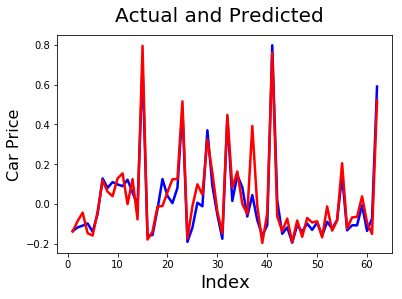

In [69]:
# Actual and Predicted
import matplotlib.pyplot as plt
c = [i for i in range(1,63,1)] # generating index 
fig = plt.figure() 
plt.plot(c,y_test, color="blue", linewidth=2.5, linestyle="-") #Plotting Actual
plt.plot(c,y_pred, color="red",  linewidth=2.5, linestyle="-") #Plotting predicted
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Car Price', fontsize=16)                       # Y-label

Text(0,0.5,'ytest-ypred')

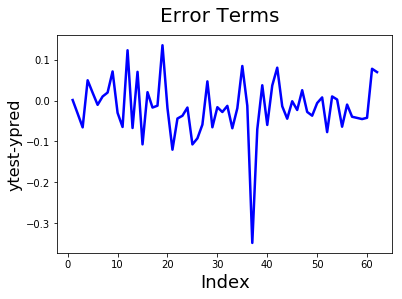

In [70]:
# Error terms
c = [i for i in range(1,63,1)]
fig = plt.figure()
plt.plot(c,y_test-y_pred, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('ytest-ypred', fontsize=16)                # Y-label

Text(0,0.5,'y_pred')

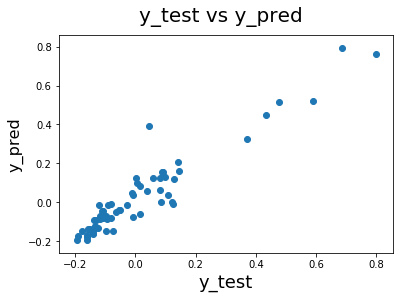

In [71]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

Text(0,0.5,'Index')

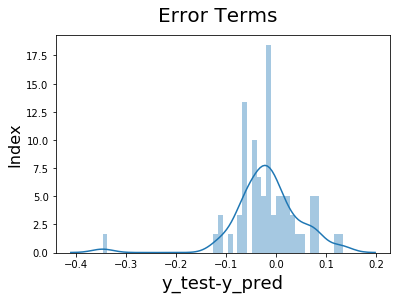

In [72]:
# Plotting the error terms to understand the distribution.
fig = plt.figure()
sns.distplot((y_test-y_pred),bins=50)
fig.suptitle('Error Terms', fontsize=20)                  # Plot heading 
plt.xlabel('y_test-y_pred', fontsize=18)                  # X-label
plt.ylabel('Index', fontsize=16)                          # Y-label

In [73]:
# Now let's check the Root Mean Square Error of our model.
import numpy as np
from sklearn import metrics
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

RMSE : 0.0704470098941


## Summary
We have used Backward elimination method, starting with RFE and then manually removing columns. lm_6 is choosen with Adj. R squared of 0.936 and used for predicting Price of car. 
Since very less no. of training data is only available, outliers are not removed from data.
Width, Weight, Engine_Size, Number of Cylinders, Rear_Engine_Location, Engine_Type and brand names like BMW, Porsche and Volvo are influencing the price of a car.
Model is evaluated by plotting graph of y_test and y_pred and also error terms are plotted. 
Spread of y_test and y_pred is plotted as scatter plot.
Error terms distribution is plotted and it follows Gaussian Distribution.
Root Mean Square Error for our model is 0.07.